In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
import pandas as pd
df = pd.read_csv("C:/Users/hp5cd/Downloads/data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:

df.info()
df.describe()

print("Missing values:\n", df.isnull().sum())

df = df.dropna()

target = 'price'
features = [col for col in df.columns if col != target]

df = pd.get_dummies(df, drop_first=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [10]:

print("Missing values:\n", df.isnull().sum())


df = df.dropna()

print("Data shape after dropping missing values:", df.shape)

df.info()


Missing values:
 Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
                                                          ..
Liability to Equity                                        0
Degree of Financial Leverage (DFL)                         0
Interest Coverage Ratio (Interest expense to EBIT)         0
Net Income Flag                                            0
Equity to Liability                                        0
Length: 96, dtype: int64
Data shape after dropping missing values: (6819, 96)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                              

In [12]:

target = 'Bankrupt?'

if target not in df.columns:
    raise KeyError(f"Target column '{target}' not found. Available columns: {df.columns.tolist()}")


X = df.drop(columns=target)
y = df[target]


X = pd.get_dummies(X, drop_first=True)


In [14]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (5455, 95)
Testing set size: (1364, 95)


In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
coefficients = pd.Series(model.coef_, index=X.columns)
print("Coefficients:\n", coefficients)


Intercept: 0.6214296070339195
Coefficients:
 ROA(C) before interest and depreciation before interest    0.402234
ROA(A) before interest and % after tax                     0.729900
ROA(B) before interest and depreciation after tax         -0.443291
Operating Gross Margin                                     0.052299
Realized Sales Gross Margin                                0.061312
                                                             ...   
Liability to Equity                                        0.142718
Degree of Financial Leverage (DFL)                         0.076419
Interest Coverage Ratio (Interest expense to EBIT)        -0.009785
Net Income Flag                                            0.000000
Equity to Liability                                        0.205325
Length: 95, dtype: float64


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nEvaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")



Evaluation Metrics:
MAE: 220663.09
MSE: 66416111826423.39
R² Score: -1845301291588091.00


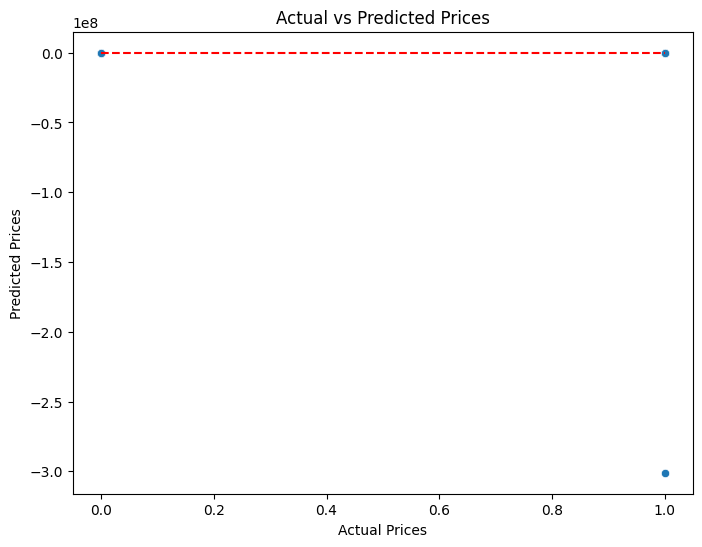

In [20]:
import matplotlib.pyplot as plt  
import seaborn as sns            

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


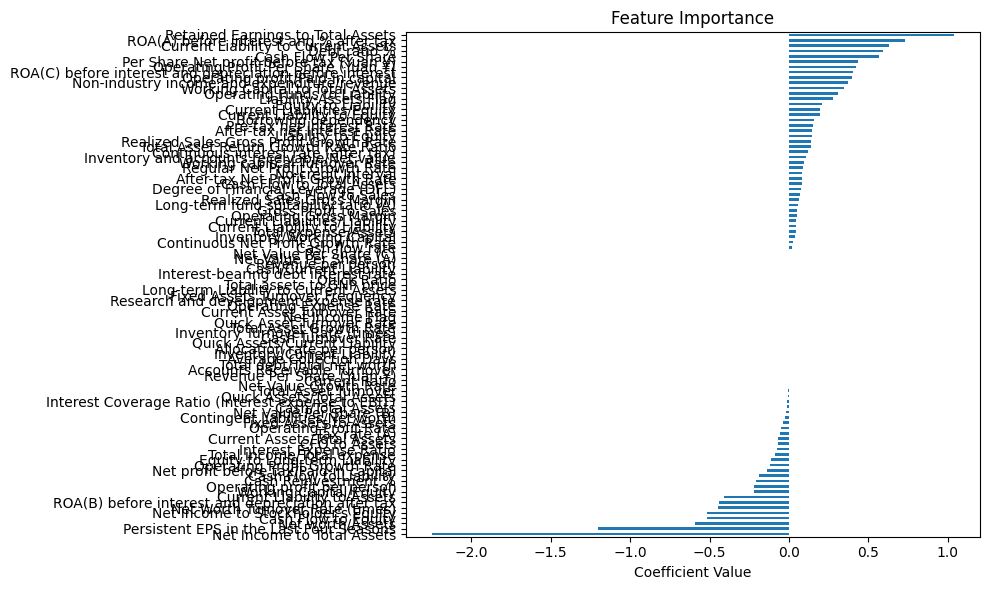

In [21]:

plt.figure(figsize=(10, 6))
coefficients.sort_values().plot(kind='barh', title="Feature Importance")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()
